<a href="https://colab.research.google.com/github/Chandr25/AlmabetterRegressionproject/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing all the necessary modules

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


##Reading Data

In [ ]:
#reading data
df =pd.read_csv("/content/drive/MyDrive/Data Almabetter/SeoulBikeData.csv",encoding='latin1')

In [ ]:
#lets see top 5 records
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#lets get some information regarding data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#lets know the columns in data
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#size of data 
df.shape

(8760, 14)

In [ ]:
#lets know some stats
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#lets look at null values in data
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#checking duplicates
df.duplicated().sum()

0

##Converting some format of data for convinience

In [ ]:
# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [ ]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

##Exploratory Data Analysis

In [ ]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [ ]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [ ]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [ ]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning Day,day_of_week,month,year
0,0,Winter,No Holiday,Yes,Thursday,January,2017
1,1,Winter,No Holiday,Yes,Thursday,January,2017
2,2,Winter,No Holiday,Yes,Thursday,January,2017
3,3,Winter,No Holiday,Yes,Thursday,January,2017
4,4,Winter,No Holiday,Yes,Thursday,January,2017


In [ ]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  day_of_week
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day_of_week, dtype: int64

 
column name  :  month
January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
Februar

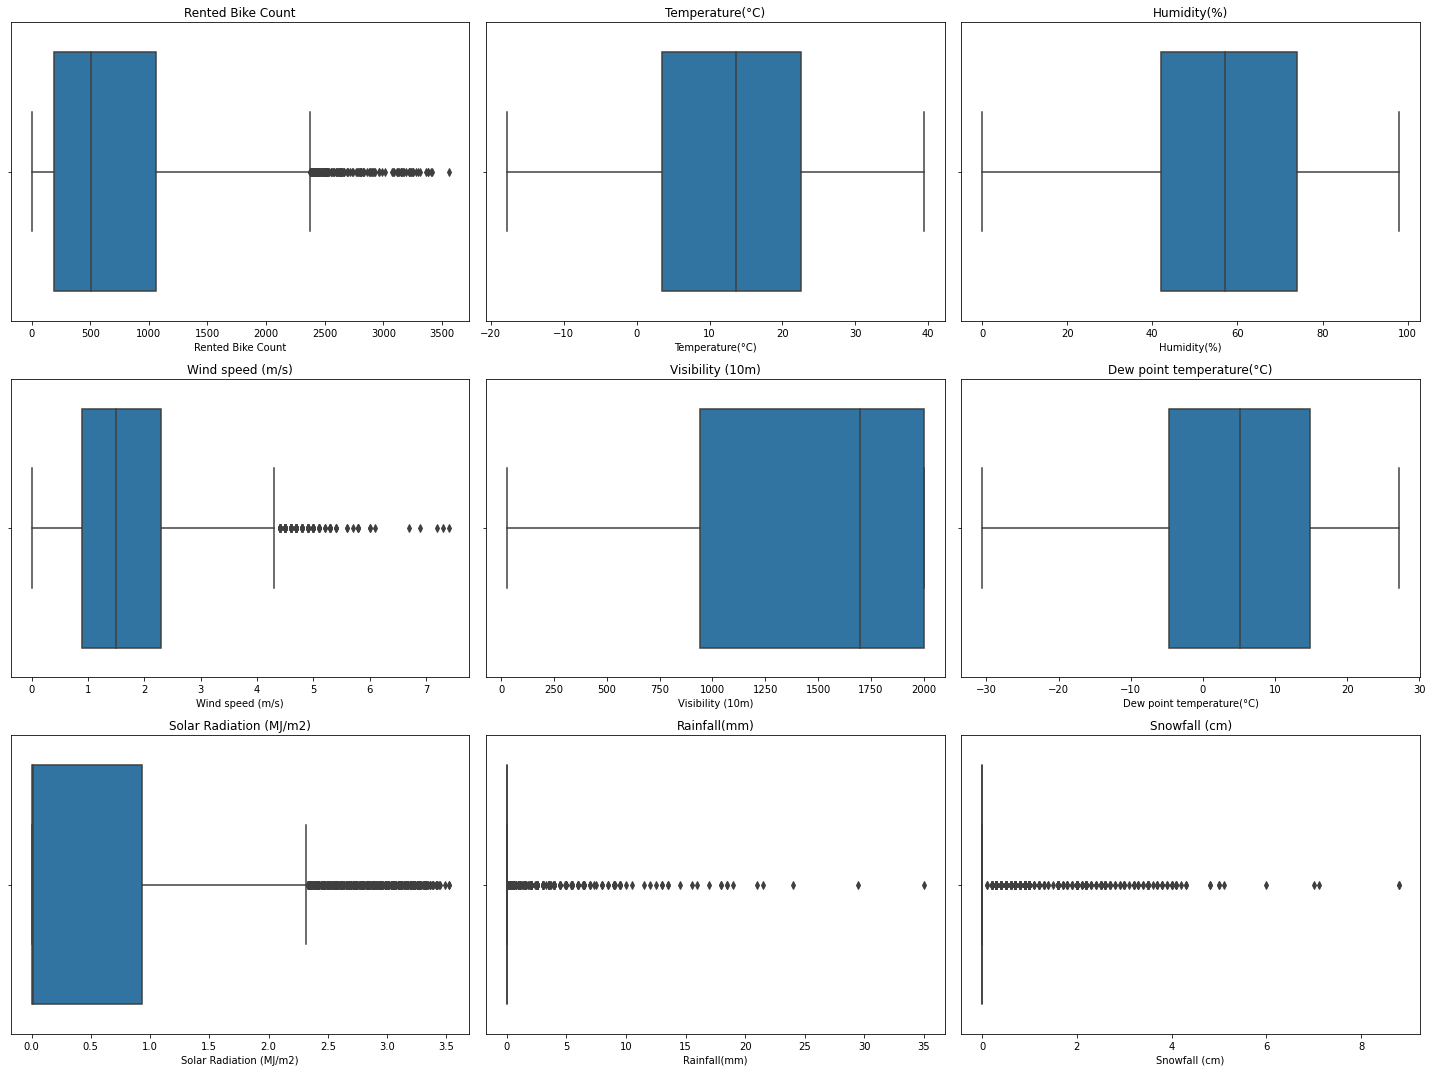

In [ ]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

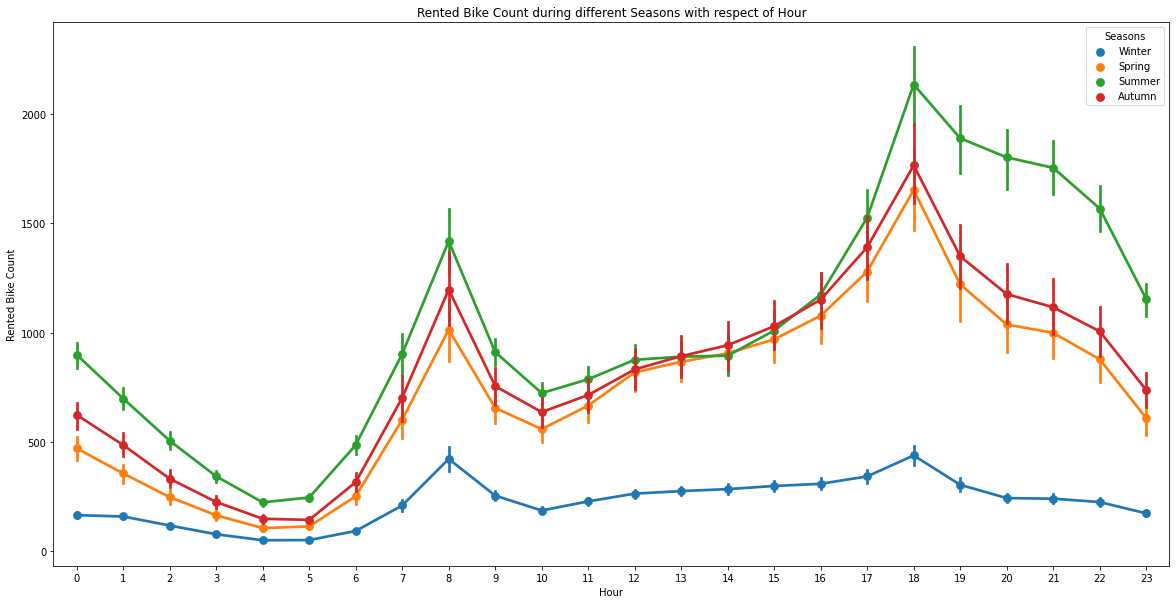

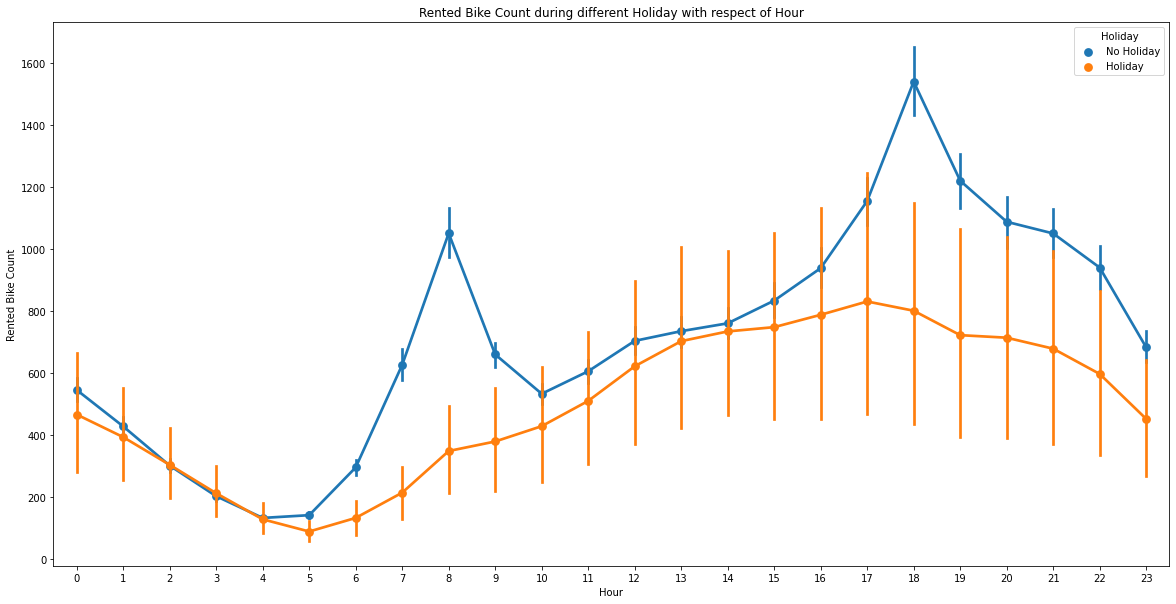

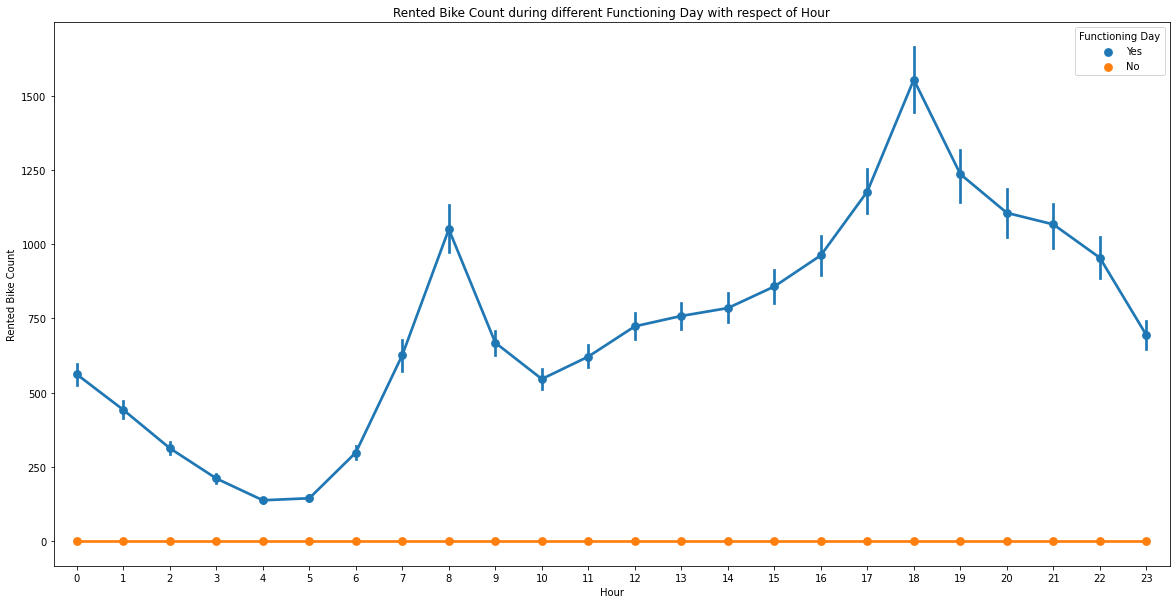

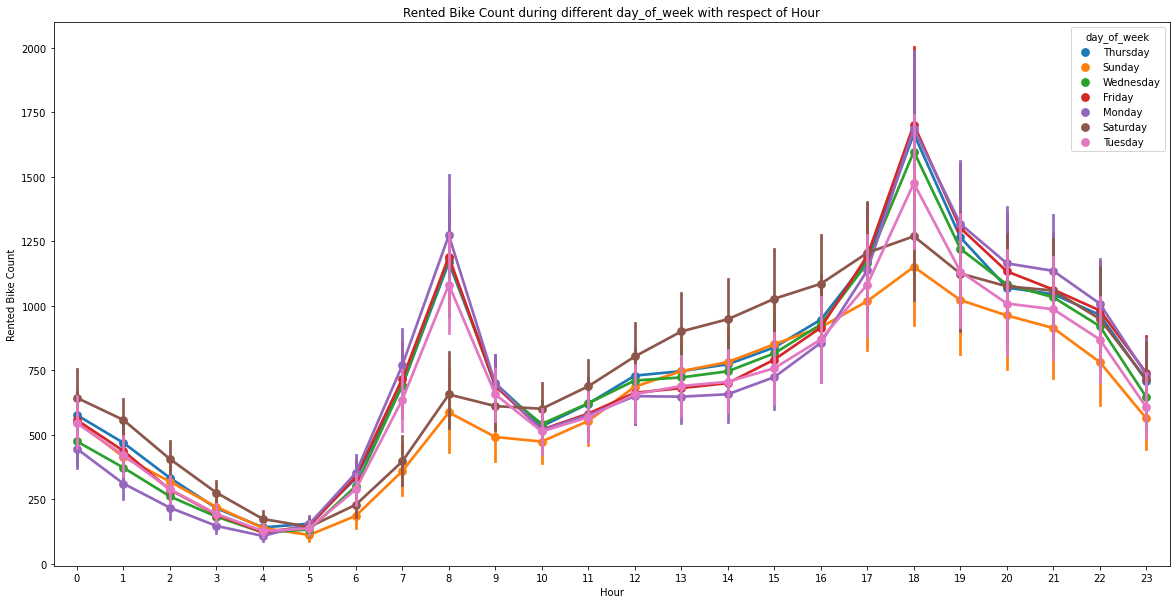

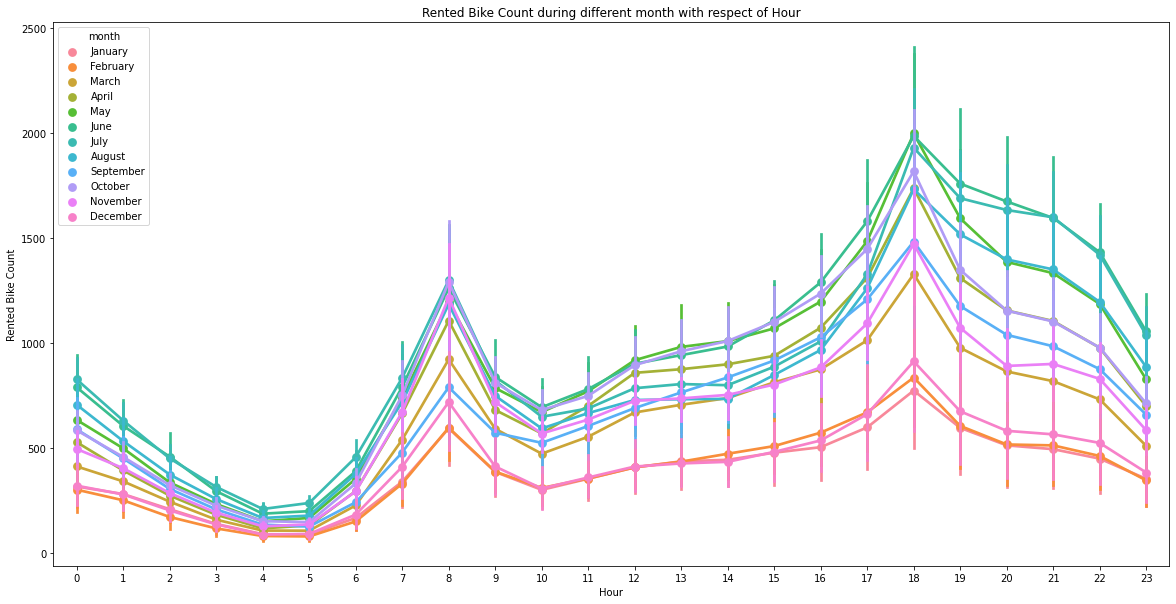

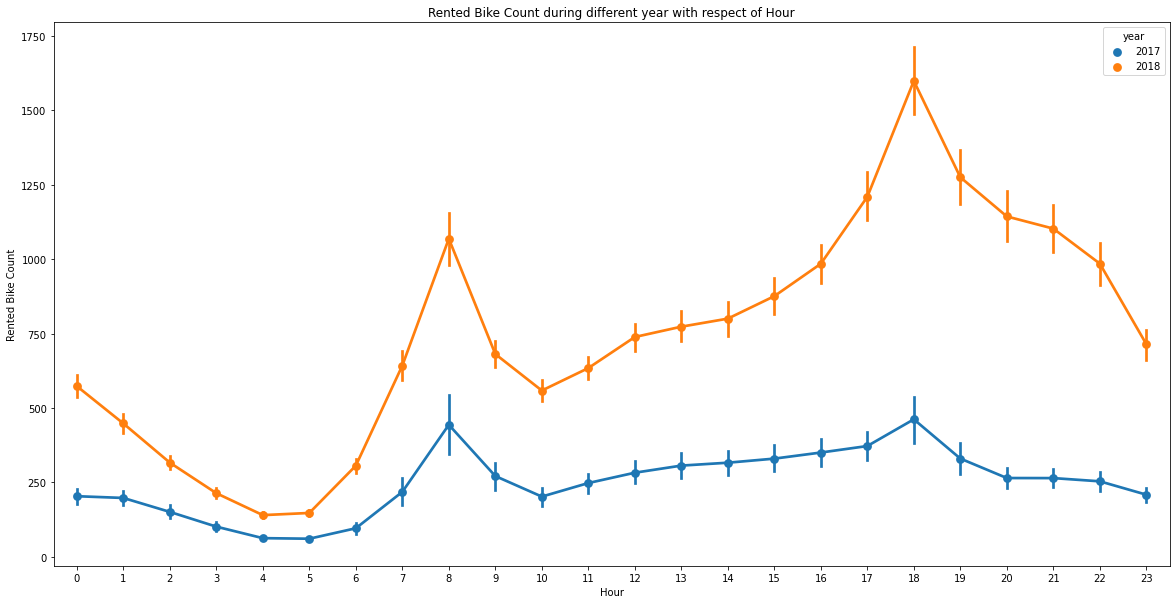

In [ ]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

##Insights from above Graphs


#Season
In the season column, we are able to understand that the demand is low in the winter season.

#Holiday
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

#Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

#Days of week
In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, we can further change this column to weekdays and weekends.

#month
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

#year
The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.



In [ ]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [ ]:
# value counts of Week column
df.week.value_counts()

Weekdays    6216
Weekend     2544
Name: week, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

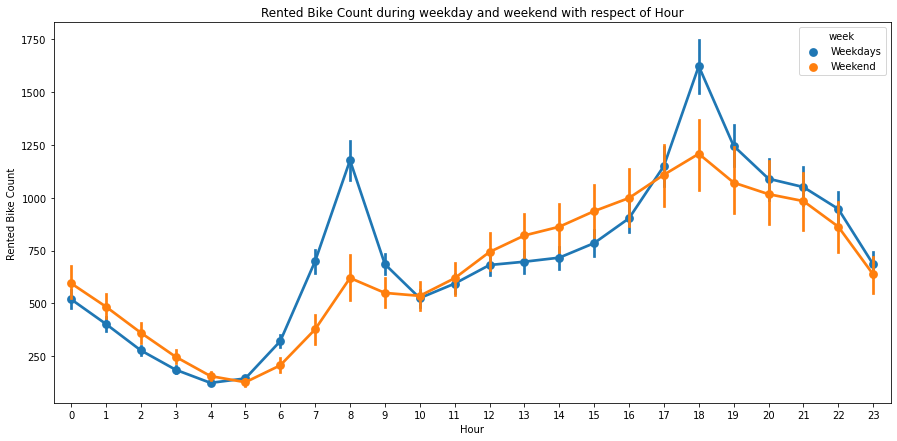

In [ ]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

#Now we can clearly see the pattern which shows that the demand is high in the afternoon on the weekend. While there is more demand during office hours in weekdays

In [ ]:
# droping the days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

##Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature

#Lets see the distribution of data

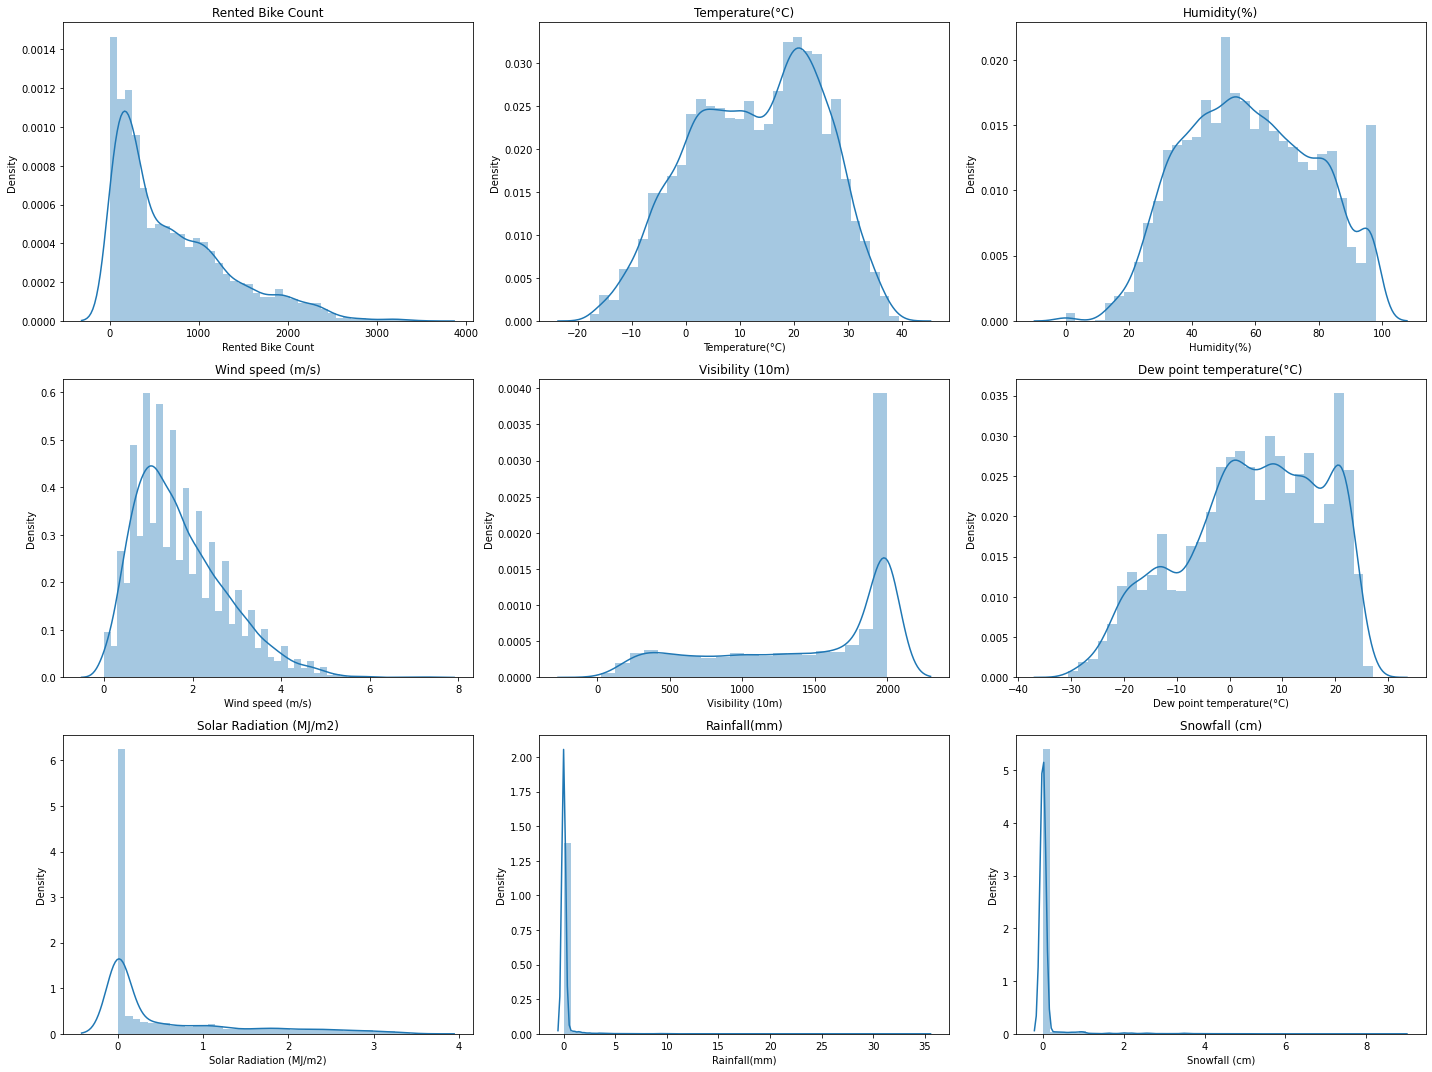

In [ ]:
# Distrubution of Data
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

#we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms
#Right skewed columns are
Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

#Left skewed columns are
Visibility (10m), Dew point temperature(°C)

##Lets get some insights over skewness of numerical features

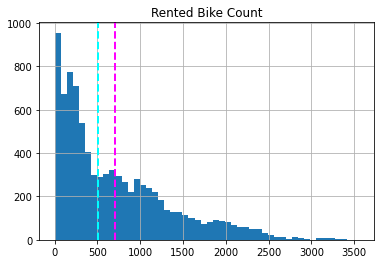

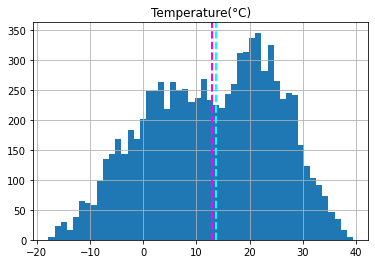

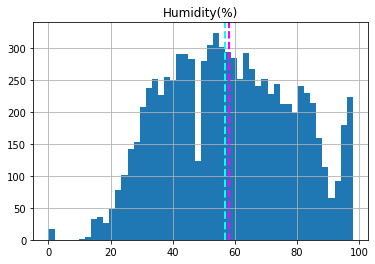

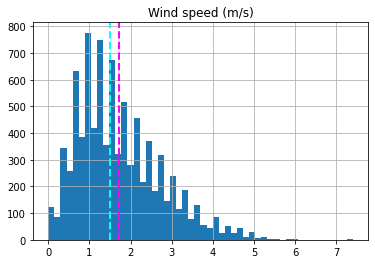

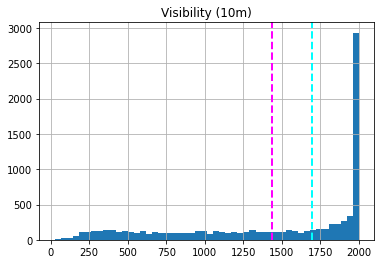

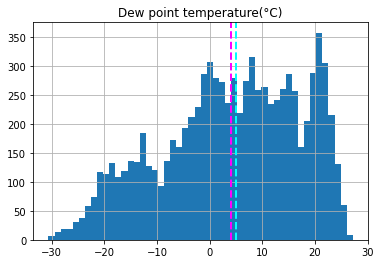

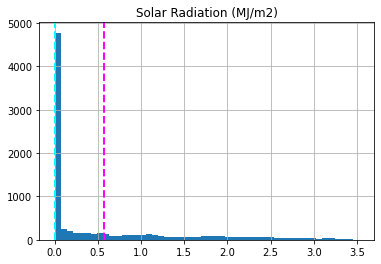

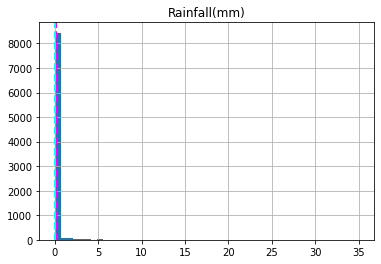

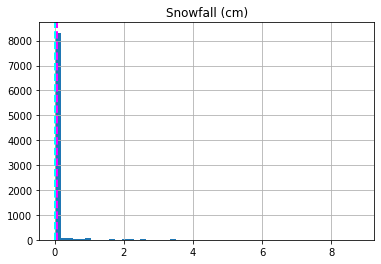

In [ ]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)

##Lets try to find how is the relation of numerical features with our dependent variable

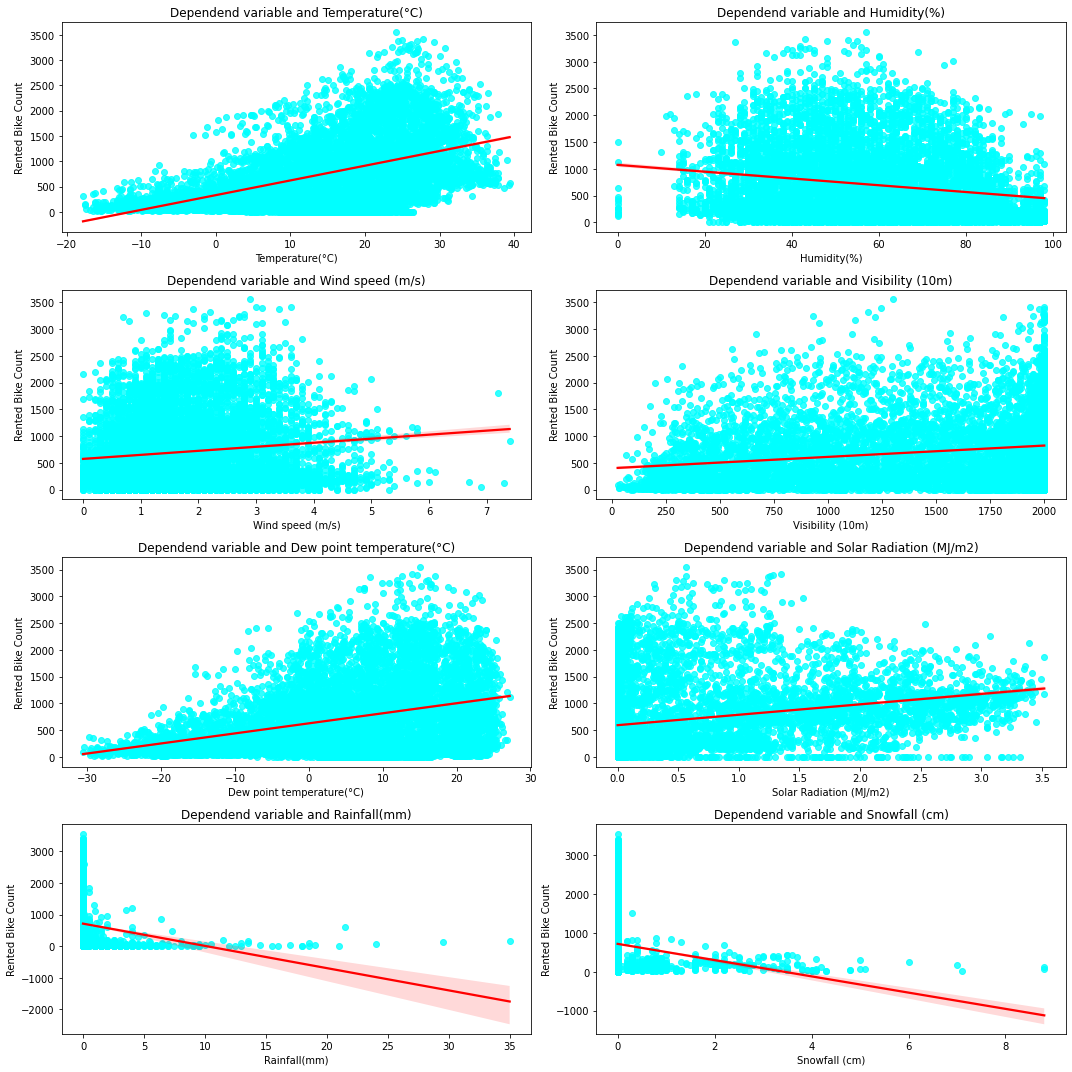

In [ ]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

#This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.

##what is the correlation of our dependent variable with the independent features

In [ ]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

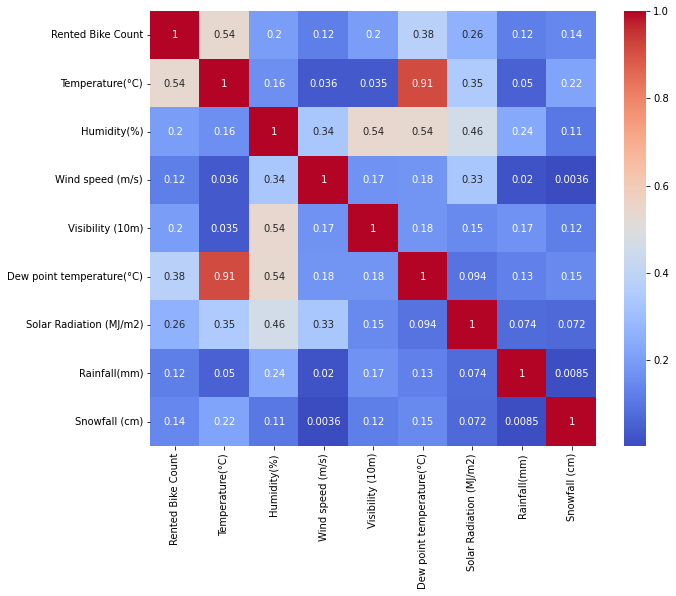

In [ ]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [ ]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays


In [ ]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [ ]:
new_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0


##We saw that our dependent variable is right skewed, it needs to be normalized.
##We do some experiments to normalize it

Text(0.5, 1.0, 'Square root')

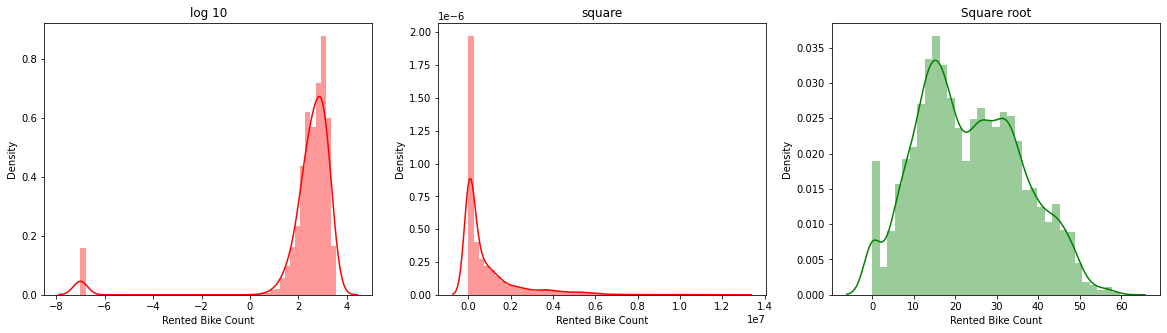

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

##Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

##Dividing data in dependent feature and Independent feature

In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y = np.sqrt(new_df['Rented Bike Count'])

In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [ ]:
X_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_Weekend
2223,16.0,14,2.2,1828,2.33,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
798,-6.7,48,2.4,1991,0.00,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7752,11.3,71,1.2,1997,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
734,3.0,28,3.8,1956,1.10,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2881,11.5,77,2.0,593,0.00,0.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,1,1


In [ ]:
X_test.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_Weekend
6056,27.2,69,1.8,1999,0.70,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5556,32.6,51,2.1,800,3.21,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5990,34.0,50,1.2,1744,1.68,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
7674,16.9,47,1.4,1637,0.11,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3319,6.4,51,1.0,1398,0.19,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_train.head()

2223    35.185224
798     11.704700
7752    29.849623
734     16.186414
2881    22.405357
Name: Rented Bike Count, dtype: float64

In [ ]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 48), (2190, 48), (6570,), (2190,))

##Creating a function to calculate score

In [ ]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))


##Transforming X_train and X_test

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
yeo = PowerTransformer()
X_train = yeo.fit_transform(X_train)
X_test = yeo.transform(X_test)

##Linear Regression

In [ ]:
# Fitting the model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.score(X_train,y_train)

0.794813122325184

In [ ]:
#predicting 
reg_pred = regression.predict(X_test)

In [ ]:
score_metrics(y_test,reg_pred)

mean absolute error is  : 207.41666780312968
mean squared error is  : 93868.92031647604
Root mean squared error is  : 306.3803523669167
R2 score is  : 0.7706043627172595


In [ ]:
regression.coef_

array([ 4.84244127, -1.46299864, -0.10044715,  0.29088451,  3.15181294,
       -2.97282854,  0.01791101, -0.43657148, -1.06081323, -1.41706587,
       -2.02154163, -1.92712698, -0.95802639,  0.01025612,  0.86074665,
       -0.51390573, -1.51276992, -1.57296373, -1.37571477, -1.34499939,
       -1.29350974, -1.09078416, -0.68059033,  0.28889088,  1.67507948,
        1.32330204,  1.31495447,  1.37700904,  1.00303563,  0.34014356,
       -1.32715513, -1.38178009, -3.39349515,  0.60842228,  5.30792837,
       -0.23217729,  0.00764478, -0.20277928, -0.01720571, -0.28303424,
        0.95185455, -0.17567796,  0.37627943,  0.06519845,  0.35172126,
       -0.04266782, -0.57320668, -0.39958343])

In [ ]:
regression.intercept_

23.442819487037085

##Lasso Regression 

In [ ]:
L1 = Lasso(alpha=0.001, max_iter=500)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)

0.7948120064774067

In [ ]:
L1_pred = L1.predict(X_test)
score_metrics(y_test,L1_pred)

mean absolute error is  : 207.4637026586552
mean squared error is  : 93937.02946963176
Root mean squared error is  : 306.49148351892546
R2 score is  : 0.770437918461373


In [ ]:
L1.coef_

array([ 4.84071091, -1.46449281, -0.09793592,  0.29092236,  3.12514199,
       -2.97414266,  0.0163546 , -0.43022366, -1.05423021, -1.41057138,
       -2.01497009, -1.9206802 , -0.95127885,  0.01658727,  0.86995557,
       -0.49953006, -1.49646076, -1.55583967, -1.35785492, -1.32762605,
       -1.27633522, -1.07402514, -0.66455624,  0.30066554,  1.6843267 ,
        1.32963752,  1.31934944,  1.38111968,  1.00720702,  0.3444535 ,
       -1.32145115, -1.37418404, -3.39204789,  0.60724315,  5.30609398,
       -0.23111552,  0.0079985 , -0.20123441, -0.01618454, -0.2807969 ,
        0.95169734, -0.17483395,  0.37632458,  0.06544604,  0.35304664,
       -0.03972067, -0.57093445, -0.39848292])

In [ ]:
L1.intercept_

23.442819487037085

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -32.63209716217096


In [ ]:
lasso_pred = lasso_regressor.predict(X_test)
score_metrics(y_test,lasso_pred)

mean absolute error is  : 207.48363092839512
mean squared error is  : 93964.52837339253
Root mean squared error is  : 306.5363410321728
R2 score is  : 0.7703707170007457


##Ridge Regression

In [ ]:
L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_regressor = GridSearchCV(L2, parameters, scoring='neg_mean_squared_error', cv=5)
L2_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,L2_regressor.best_params_)
print("\nUsing ",L2_regressor.best_params_, " the negative mean squared error is: ", L2_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1.9}

Using  {'alpha': 1.9}  the negative mean squared error is:  -32.63429582899308


In [ ]:
L2_pred = L2_regressor.predict(X_test)
score_metrics(y_test,L2_pred)

mean absolute error is  : 207.43841458794412
mean squared error is  : 93898.28666463892
Root mean squared error is  : 306.4282732788196
R2 score is  : 0.7705325976204759


##Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [ ]:
poly_X_train[:5]

array([[ 1.        ,  0.25812113, -2.33363312, ...,  0.08937158,
         0.46183767,  2.38659794],
       [ 1.        , -1.66882732, -0.4733327 , ...,  0.08937158,
        -0.19351297,  0.41900648],
       [ 1.        , -0.13370083,  0.63975501, ...,  0.08937158,
         0.46183767,  2.38659794],
       [ 1.        , -0.83036044, -1.52084266, ..., 11.18923933,
        -5.16761217,  2.38659794],
       [ 1.        , -0.1169983 ,  0.91891575, ...,  0.08937158,
         0.46183767,  2.38659794]])

In [ ]:
poly_X_test[:5]

array([[ 1.        ,  1.18752763,  0.54579593, ...,  0.08937158,
        -0.19351297,  0.41900648],
       [ 1.        ,  1.63407931, -0.32360014, ...,  0.08937158,
        -0.19351297,  0.41900648],
       [ 1.        ,  1.74972008, -0.37333614, ...,  0.08937158,
         0.46183767,  2.38659794],
       [ 1.        ,  0.33300591, -0.52360164, ...,  0.08937158,
        -0.19351297,  0.41900648],
       [ 1.        , -0.54397784, -0.32360014, ...,  0.08937158,
        -0.19351297,  0.41900648]])

In [ ]:
regression.fit(poly_X_train,y_train)

LinearRegression()

In [ ]:
regression.score(poly_X_train,y_train)

0.9260085244929298

In [ ]:
poly_pred = regression.predict(poly_X_test)

In [ ]:
score_metrics(y_test,poly_pred)

mean absolute error is  : 132.8128809774486
mean squared error is  : 47669.689042533406
Root mean squared error is  : 218.33389348091012
R2 score is  : 0.8835054386466332


##Random Forest regressor

In [ ]:
random = RandomForestRegressor(n_estimators=100,random_state=0)
random.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#predicting on training dataset 
Y_reg_pred = random.predict(X_train)

In [ ]:
#predicting on testing dataset
Y_reg_pred = random.predict(X_test)

In [ ]:
random2 = RandomForestRegressor(n_estimators = 100,random_state = 0,criterion = 'absolute_error',max_features = "sqrt",max_depth = 15)

In [ ]:
random2.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      max_features='sqrt', random_state=0)

In [ ]:
y_random = random2.predict(X_train)

In [ ]:
y_random_test = random2.predict(X_test)

In [ ]:
score_metrics(y_test,y_random_test)

mean absolute error is  : 180.31377109194364
mean squared error is  : 84119.98191378884
Root mean squared error is  : 290.0344495293427
R2 score is  : 0.7944286906223295
